In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


drive_path = "/content/drive/MyDrive/주피터_대피소/인턴/"


#df=pd.read_csv('dataset1.CSV', engine='python', encoding = 'utf-8')
#df.head()
#data['EDEC_JBRDN_AMT'].value_counts().head(50)
#data['EDEC_SBRDN_AMT'].value_counts().head(50)

Mounted at /content/drive


In [ ]:
# drive안의 file 불러오기

In [ ]:
df = pd.read_csv(drive_path + "dataset1.csv")

print(df.shape)

(1048575, 19)


In [ ]:
df.info()

## 본 데이터의 문제점은 ncols의 부재였다고 생각함.
# 따라서, cols를 증가시키는 dummy파일을 늘리고, 각 columns의 categorize를 더 세밀하게 했으면 점수는 달라졌을지도 모름.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STND_Y           1048575 non-null  int64  
 1   IDV_ID           1048575 non-null  int64  
 2   KEY_SEQ          1048575 non-null  int64  
 3   SEX              1048575 non-null  int64  
 4   AGE_GROUP        1048575 non-null  int64  
 5   SIDO             1048575 non-null  int64  
 6   RECU_FR_DT       1048575 non-null  object 
 7   FORM_CD          1048575 non-null  int64  
 8   DSBJT_CD         1048575 non-null  int64  
 9   MAIN_SICK        1048575 non-null  object 
 10  SUB_SICK         1048575 non-null  object 
 11  VSCN             1048575 non-null  int64  
 12  RECN             1048575 non-null  int64  
 13  EDEC_ADD_RT      1048575 non-null  float64
 14  EDEC_TRAMT       1048575 non-null  int64  
 15  EDEC_SBRDN_AMT   1048575 non-null  int64  
 16  EDEC_JBRDN_AMT   1

# date and season processing

In [ ]:
import datetime

#df=df[ ['SEX','AGE_GROUP','RECU_FR_DT','MAIN_SICK','SUB_SICK'] ]

df['RECU_FR_DT']=pd.to_datetime(df['RECU_FR_DT'])
df['month']=df['RECU_FR_DT'].dt.month
df['month'].value_counts()

df['MAIN_SICK'].value_counts().head(3)



I109    141027
J209     87358
E119     26401
Name: MAIN_SICK, dtype: int64

In [ ]:
def season(x) :
    if x>=3 and x<= 5 :
        return 1
    elif x>=6 and x<= 8 :
        return 2
    elif x>=9 and x<=11 :
        return 3
    else :
        return 4

df['season']=df['month'].apply(season)

df['season'].value_counts()



4    298028
3    261023
2    250327
1    239197
Name: season, dtype: int64

In [ ]:
#df=df[~df['MAIN_SICK'].str.contains('I109')]

df['MAIN_SICK'].value_counts().head(50)
##추가로 DSBJT_CD
df=df[['SEX','AGE_GROUP','season','MAIN_SICK','SUB_SICK','DSBJT_CD']]
df.head()

df.rename(columns={'SEX':'sex','AGE_GROUP':'age','season':'season','MAIN_SICK':'main','SUB_SICK':'sub', 'DSBJT_CD' : 'dsb'}, inplace=True)
df

df['dsb'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1     499181
13    133358
5      99367
14     94463
23     41631
15     35860
11     33285
4      30126
12     25427
2      13995
10     11820
9       7568
3       6881
6       6109
21      4167
7       2002
16      1661
24       506
0        430
8        218
20       134
25       118
19       103
26        97
22        60
55         4
17         2
50         1
18         1
Name: dsb, dtype: int64

In [ ]:
##상위 30개 질병에 대해서만

df30=df[df['main'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400|J060|B351|J00|J303|N_|K297|F_|M170|M5456|M4806')]

#상위 10개 질병에 대해서만
df10=df[df['main'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400')]

In [ ]:
#sns.pairplot(df, hue = 'main')

# RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
seed=42

test=df10[['sex','age','season','main','dsb']]
test

,sex,age,season,main,dsb
0,1,17,4,I109,1
1,1,17,4,I109,1
2,2,18,1,I109,1
3,2,18,1,I109,1
4,2,17,4,I109,1
...,...,...,...,...,...
1048569,2,15,4,J029,13
1048570,1,15,2,J029,13
1048571,1,15,2,J029,13
1048573,1,16,1,N400,15


In [ ]:
## 모델링 적용을 위한 feature 및 label 분류 in dai
feature = [
    'sex',
    'age',
    'season',
    #'dsb'
    'main'
]

In [ ]:
label = ['dsb']

In [ ]:
test['sex']= test['sex'].astype('category').cat.codes
test['sex'].value_counts()

test['age']= test['age'].astype('category').cat.codes
test['season']=test['season'].astype('category').cat.codes
test['main']=test['main'].astype('category').cat.codes
print(test.info())


test['main'].value_counts().head(50)


#df1=df.iloc[:5000]

test1=test.iloc[:40000]

test1['main'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379564 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   sex     379564 non-null  int8 
 1   age     379564 non-null  int8 
 2   season  379564 non-null  int8 
 3   main    379564 non-null  int8 
 4   dsb     379564 non-null  int64
dtypes: int64(1), int8(4)
memory usage: 7.2 MB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

1    15020
4     6001
9     5888
6     4220
7     3146
8     1500
0     1386
5     1367
2      886
3      586
Name: main, dtype: int64

In [ ]:
x=test1[feature]
y=test1[label]

y.value_counts()

dsb
1      27197
15      5283
13      1899
23      1866
14      1363
4       1138
11       302
5        223
6        219
2        190
9         95
16        86
7         61
10        27
21        26
24        10
26         6
19         4
0          2
20         1
12         1
25         1
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=seed)
print(x_train)


        sex  age  season  main
42939     1   13       0     6
58410     0   17       2     9
6046      1   15       0     1
57119     0   14       3     9
64085     1   14       0     3
...     ...  ...     ...   ...
6265      1   13       2     1
14610     1   14       3     6
118549    1   14       0     1
860       0   15       3     1
28295     0   13       3     6

[36000 rows x 4 columns]


In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#oneh = OneHotEncoder(handle_unknown="ignore")
#oneh.fit(train[feature])
#x_test = oneh.transform(train[feature])
#x_train

#x_test

In [ ]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=0,oob_score=True)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('rfc score is :', metrics.accuracy_score(y_pred, y_test))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
estimator = rfc.estimators_[0]
estimator

DecisionTreeClassifier(max_features='auto', random_state=209652396)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print("train accuracy : {:.3f}".format(rfc.score(x_train,y_train)))

print("test accuracy : {:.3f}".format(rfc.score(x_test,y_test)))




Model accuracy score with 10 decision-trees : 0.8290
train accuracy : 0.830
test accuracy : 0.829


In [ ]:
predicted = rfc.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rfc.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')



Out-of-bag score estimate: 0.828
Mean accuracy score: 0.829


In [ ]:
import pydot

In [ ]:

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = None,
                class_names = None,
                rounded = True, proportion = True, 
                precision = 3, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pydot

(graph,)=pydot.graph_from_dot_file('tree.dot', encoding='utf8')

graph.write_png('/content/drive/MyDrive/주피터_대피소/인턴/tree.png')

In [ ]:
from PIL import Image as img

image = img.open('tree.png')
image.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


#print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        30
          18       0.00      0.00      0.00        39
          29       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         4
          41       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          53       0.00      0.00      0.00         7
          57       0.00      0.00      0.00         6
          83       0.00      0.00      0.00        68
          85       0.00      0.00      0.00        22
          86       0.00      0.00      0.00         9
          88       0.00      0.00      0.00         5
          90       0.00      0.00      0.00         1
          91       0.00      0.00      0.00         1
          95       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(rfc.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(df1[feature], rfc.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
#sns.barplot(x=df1[feature], y=rfc.feature_importances_ )


Feature importances:
[0.308 0.397 0.295]
sex : 0.308
age : 0.397
season : 0.295


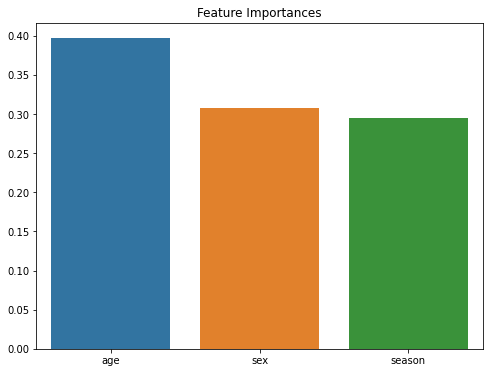

In [ ]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr= ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr.index, y=ftr)
plt.show()

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TypeError: ignored

In [ ]:
y_pred_100 = rfc_100.predict(x_test)

In [ ]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.1016


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        30
          18       0.00      0.00      0.00        39
          29       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         4
          41       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          53       0.00      0.00      0.00         7
          57       0.00      0.00      0.00         6
          83       0.00      0.00      0.00        68
          85       0.00      0.00      0.00        22
          86       0.00      0.00      0.00         9
          88       0.00      0.00      0.00         5
          90       0.00      0.00      0.00         1
          91       0.00      0.00      0.00         1
          95       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


age       0.396955
sex       0.307793
season    0.295252
dtype: float64

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = x_test.shape[1]
depth_range = range(1, max_attributes)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = rand_clf.fit(x_train, y_train)
        valid_acc = model.score(x_test, y_test)
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

NameError: ignored

In [ ]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
gdb=GradientBoostingClassifier(random_state=seed)
gdb.fit(x_train, y_train)

In [ ]:
##다시
#print(dai_rf_test)

#y_pred=gdb.predict(dai_rf_test)


In [ ]:
print("Feature importances:\n{0}".format(np.round(rand_clf.feature_importances_, 3)))